# Support Vector Classifier

In [18]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [19]:
mplstyle.use(['dark_background', 'ggplot', 'fast'])
%matplotlib nbagg

In [20]:
cancer = load_breast_cancer()

In [21]:
print(cancer.keys())
#print(cancer['target'])
print(cancer['target_names'])
print(cancer['feature_names'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
data = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [22]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df_target = pd.DataFrame(cancer['target'], columns=['Cancer'])
df_target.head() 
# 0 -> 'malignant' 
# 1 -> 'benign'

,Cancer
0,0
1,0
2,0
3,0
4,0


In [8]:
#df_target['Type']=np.where(df_target['Cancer']==0, 'malignant', 'benign')
#df_target.head()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data, np.ravel(df_target), test_size=.33, random_state=101)

In [25]:
model = SVC(gamma='auto')
model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [26]:
conf_matrix = confusion_matrix(y_test, predictions)
print('Classification Report \n', classification_report(y_test, predictions))

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.62      1.00      0.77       117

   micro avg       0.62      0.62      0.62       188
   macro avg       0.31      0.50      0.38       188
weighted avg       0.39      0.62      0.48       188



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
def accuracy_chart(conf_matrix):
    tn, fn, fp, tp = conf_matrix.ravel()
    plt.bar([0, 1, 2, 3], [tn, fn, fp, tp], tick_label=['True Negative', 'False Negative', 'False Positive', 'True Positive'], color=['g', 'r', 'r', 'g'])
    plt.ylabel('predictions')
    plt.xlabel('Parameters')
    plt.title('Accuracy Chart')

<IPython.core.display.Javascript object>


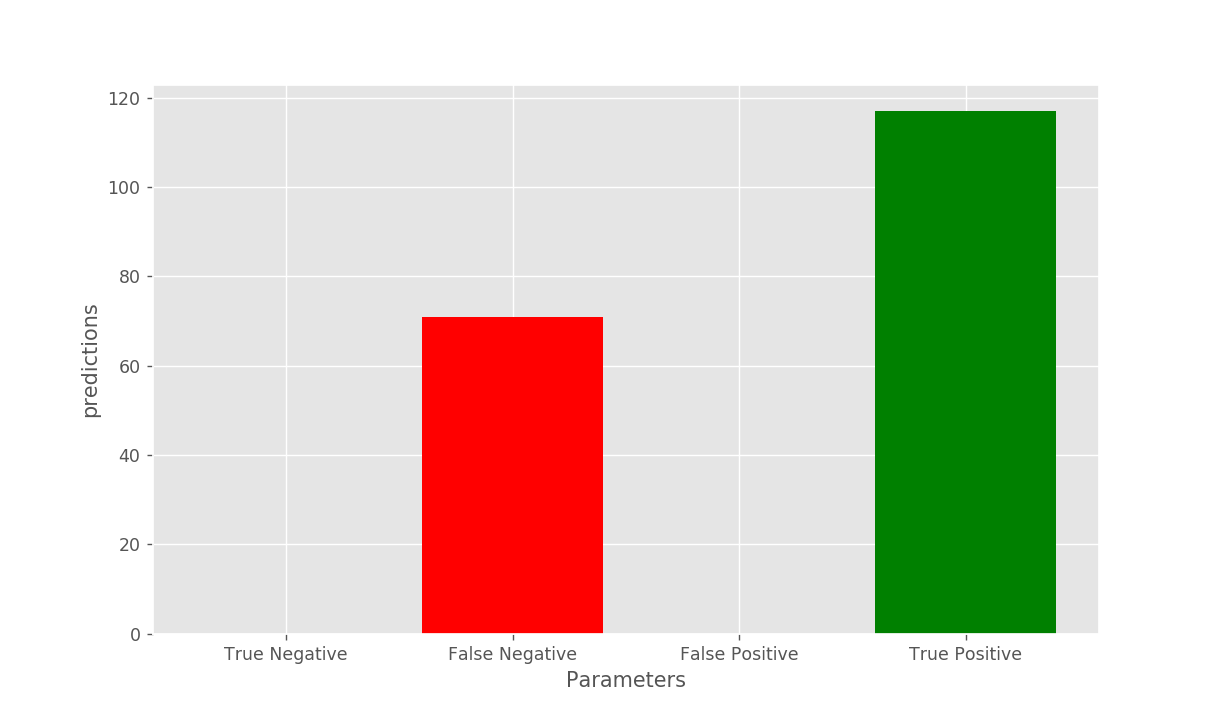

In [28]:
accuracy_chart(conf_matrix)

Model is completely wrong. It needs Parameter Tuning to perform well

## Parameter Tuning of SVC

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.001, 0.0001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6299212598425197, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6299212598425197, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6299212598425197, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6299212598425197, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6299212598425197, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6299212598425197, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ...........................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [31]:
print(grid.best_params_, end='\n\n')
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Check The model with best parameters

<IPython.core.display.Javascript object>


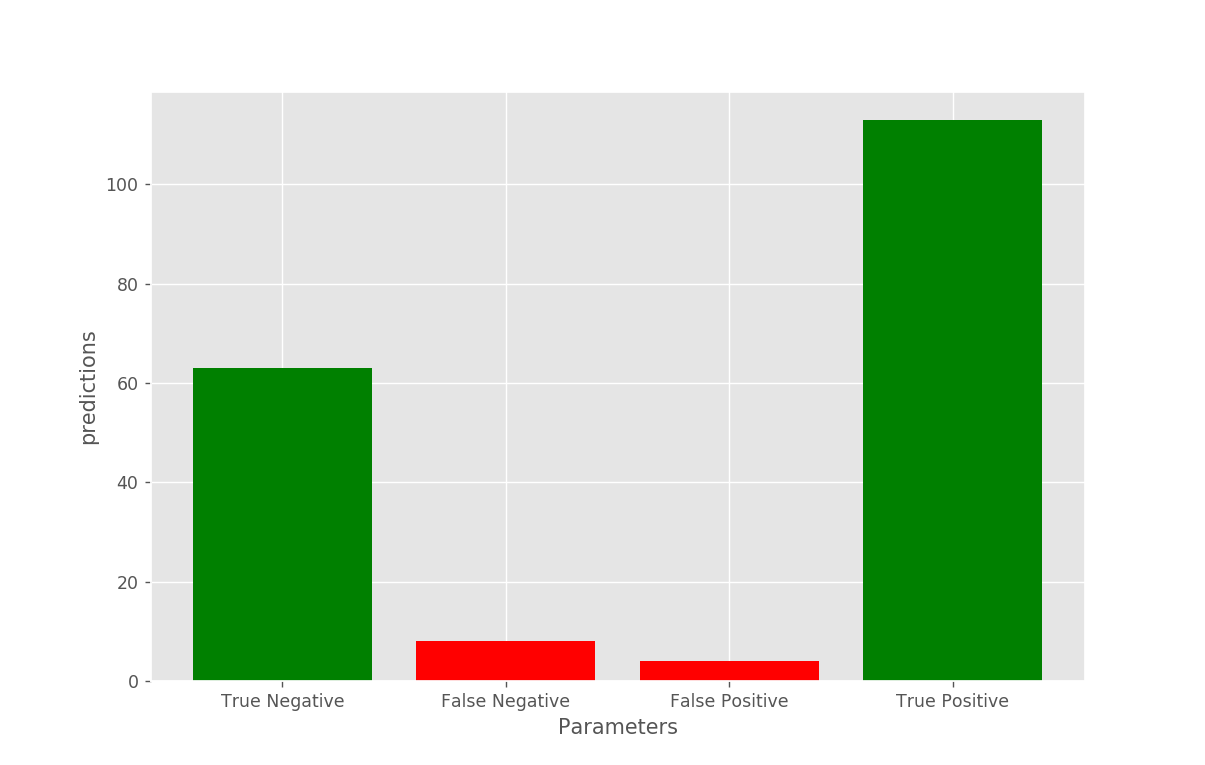

In [32]:
predictions = grid.predict(x_test)
conf_matrix = confusion_matrix(y_test, predictions)
accuracy_chart(conf_matrix)